# Salary Prediction Model


The objective is to conduct a comprehensive analysis of a salary prediction case study, encompassing data exploration, visualization, model training, and evaluation.The project also aims to build an accurate predictive model for salary based on diverse features given in the dataset.

## Importing the necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

Importing necessary libraries for data manipulation, visualization, and machine learning. These include Pandas for data handling, NumPy for numerical operations, Seaborn and Matplotlib for visualization, Statsmodels for statistical models, Winsorize from SciPy for outlier handling, and various regression algorithms from scikit-learn. GridSearchCV is imported for hyperparameter tuning.







## Data Exploration

#### Loading the Datasets

I first dowloaded the given csv files and uploaded them in my folder where this Jupyter Notebook is present.I'll be reading all three CSV files ("ML case Study.csv", "Colleges.csv", and "cities.csv") into Pandas DataFrames: df for the main dataset, colleges_df for college-related data, and city_df for city-related data. The parameter header=0 indicates that the first row contains column headers.

In [3]:
df = pd.read_csv("ML case Study.csv", header =0)
colleges_df = pd.read_csv("Colleges.csv", header =0)
city_df = pd.read_csv("cities.csv", header =0)

let's see how our datasets are individually

In [5]:
df

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10
...,...,...,...,...,...,...,...,...
1584,BITS Pilani (Goa Campus),Surat,Executive,61285.0,3,44,60,77283.59
1585,NIT Warangal,Rajpur Sonarpur,Executive,63140.0,1,44,24,68416.86
1586,NIT Tiruchipally (Trichy),Ahmedabad,Executive,44907.0,1,60,19,70186.19
1587,IIIT Hyderabad,Durgapur,Executive,52054.0,2,67,29,73394.09


## Data Preprocessing

#### Handling Missing values 

In [6]:
colleges_df

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus
5,IIT Roorkee,IIIT Lucknow,"KIIT, Bhubaneswar"
6,IIT Guwahati,MNNIT Allahabad,Amity University
7,IIIT Hyderabad,Punjab Engineering College,"BMS College, Bangalore"
8,BITS Pilani (Pilani Campus),DAIICT,"PES University, Bangalore"
9,IIT Indore,MNIT Jaipur,"USIT, Delhi"


Filling NaN values in 'Tier 1' and 'Tier 3' columns with "Unknown" in colleges_df using`fillna` method. This ensures that any missing values in these columns are replaced with a specified placeholder.

In [7]:
colleges_df['Tier 1'].fillna("Unknown", inplace=True)
colleges_df['Tier 3'].fillna("Unknown", inplace=True)

 Displaying the first 30 rows of the colleges_df DataFrame

In [8]:
colleges_df.head(30)

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus
5,IIT Roorkee,IIIT Lucknow,"KIIT, Bhubaneswar"
6,IIT Guwahati,MNNIT Allahabad,Amity University
7,IIIT Hyderabad,Punjab Engineering College,"BMS College, Bangalore"
8,BITS Pilani (Pilani Campus),DAIICT,"PES University, Bangalore"
9,IIT Indore,MNIT Jaipur,"USIT, Delhi"


Here we can see that the Nan Values have been replaced with Unknown word

In [9]:
city_df

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode
5,Hyderabad,Rajpur Sonarpur
6,Ahmedabad,Kolhapur
7,Pune,Ajmer
8,Surat,NaN


Filling missing values in the 'non-metro cities' column of city_df with 'Unknown'

In [10]:
city_df['non-metro cities'].fillna("Unknown", inplace=True)
city_df

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode
5,Hyderabad,Rajpur Sonarpur
6,Ahmedabad,Kolhapur
7,Pune,Ajmer
8,Surat,Unknown


Displaying a concise summary of the information about the DataFrame df. It provides details such as the number of non-null entries, data types, and memory usage for each column. This helps in understanding the structure and completeness of the dataset.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


The count for all the columns is same.Still we'll count the number of missing values (NaN) in each column of the DataFrame df

In [12]:
df.isnull().sum()

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64

This confirms that there are no Null values present in the data.

Now, we'll removes duplicate rows from the DataFrame df, keeping only the first occurrence of each duplicated row. This operation helps in ensuring data integrity and removing redundant information from the dataset.

In [13]:
df = df.drop_duplicates()

Let's find the number of rows, and the number of columns in the DataFrame.

In [14]:
df.shape

(1589, 8)

It shows that the DataFrame has '1589' rows and '8' columns.

## Feature Engineering

In [15]:
#Mapping the 'College' column based on tiers

def map_college(item):
    if item in Tier1:
        return 1
    elif item in Tier2:
        return 2
    elif item in Tier3:
        return 3
    else:
        return item

This function map_college takes an item as input and maps it to a numerical value based on its membership in the Tier1, Tier2, and Tier3 lists. If the item is in Tier1, it returns 1; if it's in Tier2, it returns 2; if it's in Tier3, it returns 3. If the item is not found in any of these lists, it returns the item itself. This function is used to convert the 'College' column in the DataFrame df to numerical values.

In [16]:
Tier1 = colleges_df["Tier 1"].tolist()
Tier2 = colleges_df["Tier 2"].tolist()
Tier3 = colleges_df["Tier 3"].tolist()

These lists will be used to check the membership of items in the 'College' column of the main DataFrame (df) in the subsequent code.

In [17]:
# Applying the mapping function to the 'College' column
df['College'] = df['College'].apply(map_college)

The function maps each college name to its corresponding tier (1, 2, or 3) based on the predefined lists (Tier1, Tier2, Tier3). The 'College' column is then updated with these numerical values.

In [18]:
#Mapping the 'City' column based on metro and non-metro

def map_city(item):
    if item in metro_cities:
        return 1
    elif item in non_metro_cities:
        return 0
    else:
        return item

This function, map_city, is designed to be applied to the 'City' column of the DataFrame. It checks whether each city in the column belongs to either metro_cities or non_metro_cities. If it's a metro city, it returns 1; if it's a non-metro city, it returns 0. If the city is not found in either list, it keeps the original value

In [19]:
# Creating lists for metro and non-metro cities

metro_cities = city_df["Metrio City"].tolist()
non_metro_cities = city_df["non-metro cities"].tolist()
df['City'] = df['City'].apply(map_city)

Here, two lists, metro_cities and non_metro_cities, are created based on the columns 'Metrio City' and 'non-metro cities' from the city_df DataFrame. The map_city function is then applied to the 'City' column in the main DataFrame (df). The values in the 'City' column are replaced with 1 if they belong to metro_cities, 0 if they belong to non_metro_cities, and retain their original values if they don't match either list.

In [20]:
# Displaying the updated dataframe

df

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10
...,...,...,...,...,...,...,...,...
1584,1,1,Executive,61285.0,3,44,60,77283.59
1585,1,0,Executive,63140.0,1,44,24,68416.86
1586,1,1,Executive,44907.0,1,60,19,70186.19
1587,1,0,Executive,52054.0,2,67,29,73394.09


Here, we can see the previous categorical columns of 'College' and 'City' are replaced with numerical values.

Even though we mapped 'College' and 'City' to numeric values earlier, they may still retain some ordinal relationship. One-hot encoding ensures that each category becomes a binary column, and it helps the machine learning models better understand and interpret the categorical data without imposing any ordinal relationship. It avoids the assumption that a larger numeric value represents a higher category.

In [21]:
# Creating dummy variables for 'College', 'City' column

df = pd.get_dummies(df, columns = ['College', 'City']) 
df


,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_1,College_2,College_3,City_0,City_1
0,Manager,55523.0,3,66,19,71406.58,0,1,0,1,0
1,Executive,57081.0,1,84,18,68005.87,0,1,0,1,0
2,Executive,60347.0,2,52,28,76764.02,0,0,1,1,0
3,Executive,49010.0,2,81,33,82092.39,0,0,1,1,0
4,Executive,57879.0,4,74,32,73878.10,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1584,Executive,61285.0,3,44,60,77283.59,1,0,0,0,1
1585,Executive,63140.0,1,44,24,68416.86,1,0,0,1,0
1586,Executive,44907.0,1,60,19,70186.19,1,0,0,0,1
1587,Executive,52054.0,2,67,29,73394.09,1,0,0,1,0


This code uses function of pandas to convert categorical variables in the 'College' and 'City' columns into numerical format. It creates binary columns for each category and assigns 1 if the category is present and 0 if not. The resulting DataFrame (df) has additional columns representing the one-hot encoded values for 'College' and 'City'.

In [22]:
# Creating dummy variables for 'Role' column

df = pd.get_dummies(df,columns = ["Role"], drop_first = True)

The pd.get_dummies function is used to convert categorical variable into dummyvariables. The columns=["Role"] argument specifies the column to be one-hot encoded, and drop_first=True drops the first dummy variable to avoid multicollinearity issues.

Creating a new column in the DataFrame called 'EXP(Year)' by dividing the 'EXP (Month)' column by 12

In [24]:
df['EXP(Year)'] = df['EXP (Month)'] / 12

# Drop the original "EXP (Month)" column 
df = df.drop('EXP (Month)', axis=1)

In [25]:
#Displaying tht Updated DataFrame
df.head()

,Previous CTC,Previous job change,Graduation Marks,CTC,College_1,College_2,College_3,City_0,City_1,Role_Manager,EXP(Year)
0,55523.0,3,66,71406.58,0,1,0,1,0,1,1.583333
1,57081.0,1,84,68005.87,0,1,0,1,0,0,1.500000
2,60347.0,2,52,76764.02,0,0,1,1,0,0,2.333333
3,49010.0,2,81,82092.39,0,0,1,1,0,0,2.750000
4,57879.0,4,74,73878.10,1,0,0,1,0,0,2.666667


I'll be Renaming columns for better understanding

In [136]:
new_column_names = {
    'College_1': 'Tier1',
    'College_2': 'Tier2',
    'College_3': 'Tier3',
    'City_0': 'Non-Metro_city',
    'City_1': 'Metro_city'
    
}

df.rename(columns=new_column_names, inplace=True)

Now we'll a generate descriptive statistics of the dataframe This provides a summary of the central tendency, dispersion, and shape of the distribution of a dataset.

In [82]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,CTC,College_1,College_2,College_3,City_0,City_1,Role_Manager,EXP(Year)
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,75353.278798,0.363751,0.297042,0.339207,0.485840,0.514160,0.206419,3.253724
std,6655.218445,1.123918,14.935139,12587.288237,0.481230,0.457099,0.473589,0.499957,0.499957,0.404862,1.175740
min,36990.000000,1.000000,35.000000,53020.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000
25%,50518.000000,2.000000,46.000000,66902.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.166667
50%,55291.000000,3.000000,60.000000,73028.670000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.250000
75%,60109.000000,4.000000,73.000000,80588.670000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.250000
max,77911.000000,4.000000,85.000000,123416.990000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.333333


## Exploratory Data Analysis

Text(0.5, 1.0, 'Correlation Matrix')

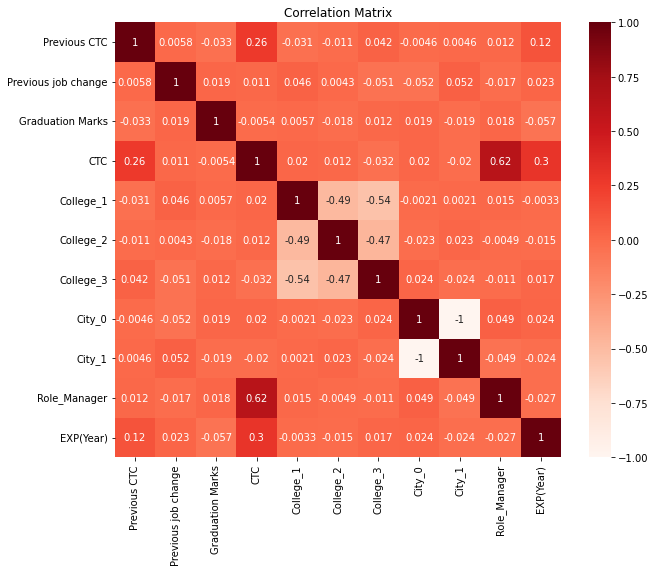

In [26]:
# Visualizing the correlation matrix

plt.figure(figsize=(10, 8))  
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')


Generated a heatmap of the correlation matrix for the DataFrame using the seaborn library. The plt.figure(figsize=(10, 8)) line sets the size of the plot. The sns.heatmap(df.corr(), cmap='Reds', annot=True) line creates a heatmap with correlations between different columns, and the color map is set to 'Reds'. The annot=True parameter adds numeric annotations to each cell. Finally, plt.title('Correlation Matrix') adds a title to the plot, indicating that it represents the correlation matrix. This visualization helps in understanding the relationships between different variables in the dataset.

We can see that 'CTC' and 'Role_Manager' is highly correlated among the variables.

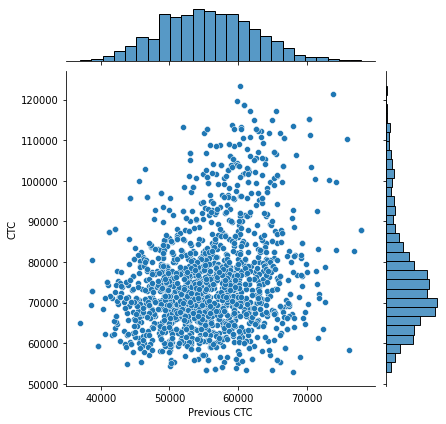

In [27]:
# Visualizing joint plots for 'Previous CTC' and 'CTC'

sns.jointplot(x= "Previous CTC", y="CTC", data =df)

Created a joint plot using seaborn to visualize the relationship between "Previous CTC" (x-axis) and "CTC" (y-axis) columns in the DataFrame df. The sns.jointplot() function combines scatter plots for the two variables along with histograms on the sides, providing insights into their distribution and correlation.







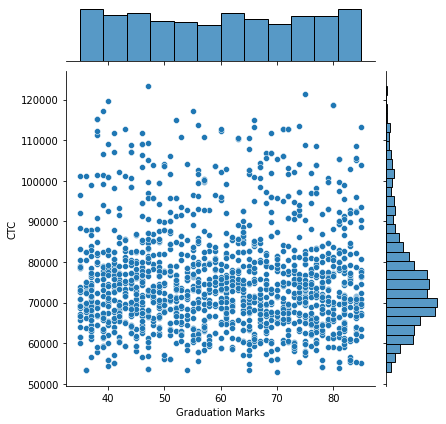

In [28]:
#Visualizing joint plots for 'Graduation Marks' and 'CTC'

sns.jointplot(x= "Graduation Marks", y="CTC", data =df)

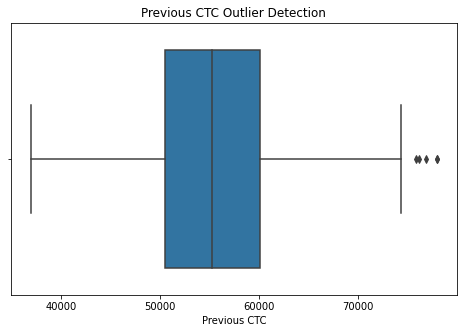

In [29]:
#Visualizing boxplot for 'Previous CTC'

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Previous CTC'])
plt.title("Previous CTC Outlier Detection")
plt.xlabel("Previous CTC")
plt.show()

Created a boxplot using seaborn to visualize the distribution of the "Previous CTC" column in the DataFrame df. The plot is used for outlier detection, highlighting the spread of values and identifying any potential outliers in the "Previous CTC" data. The box represents the interquartile range (IQR), and points beyond the whiskers may be considered outliers.

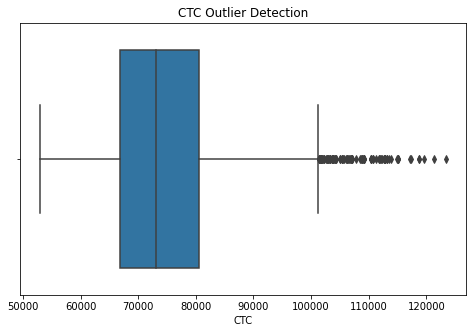

In [30]:
# Visualizing boxplot for 'CTC'

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['CTC'])
plt.title("CTC Outlier Detection")
plt.xlabel("CTC")
plt.show()

Again created a boxplot to visualize the distribution of the "CTC" column in the DataFrame df

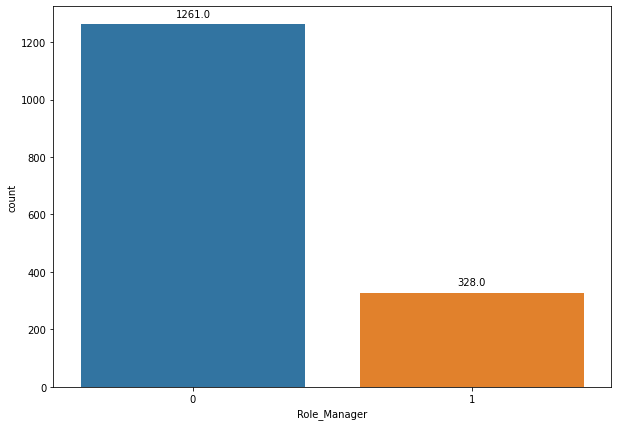

In [31]:
# Visualizing countplot for 'Role_Manager'

plt.figure(figsize=(10, 7))
ax = sns.countplot(x="Role_Manager", data=df)

# Annotating each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Created a countplot using seaborn to visualize the distribution of the "Role_Manager" column in the DataFrame df. The plot displays the count of occurrences for each category of the "Role_Manager" column, distinguishing between different roles. Annotations are added above each bar to indicate the count, providing additional information about the distribution.

## Data Preprocessing

### Handling Outliers

When I tried to remove the outliers the r2_score decreased as well suggesting that it possessed valuable information.Therefore we will use the Winsorization which will help us to mitigate the impact of outliers by replacing extreme values with less extreme ones. The winsorize function in Python, particularly from the scipy.stats.mstats module, is a commonly used tool for applying winsorization to a dataset. It allows researchers to set limits or thresholds for trimming extreme values, thus providing a more robust analysis in the presence of outliers.

In [141]:
# Winsorizing outliers in 'Previous CTC' and 'CTC'

threshold = 0.05

# Winsorize the 'Previous CTC' column
df['Previous CTC'] = winsorize(df['Previous CTC'], limits=[threshold, threshold])

# Winsorize the 'CTC' column
df['CTC'] = winsorize(df['CTC'], limits=[threshold, threshold])

The threshold parameter determines the proportion of values to be winsorized from each tail of the distribution. In this case, 5% of the extreme values on both ends of the distribution are replaced.This helps reduce the impact of outliers on modeling.

Now,Let's find the number of rows, and the number of columns in the DataFrame.

In [33]:
df.shape

(1589, 11)

This shows that our Updated DataFrame has '1589' Rows and '11' Columns.

This separation is a common practice in machine learning, where x contains the input features, and y contains the corresponding output or target variable. This allows for a clear distinction between the features used for prediction and the target variable being predicted.

In [35]:
# Creating features (X) and target variable (y)
x = df.drop("CTC", axis = 1)
y = df["CTC"]

x represents the independent variables or features. It is obtained by dropping the column labeled "CTC" along the columns (axis=1) from the DataFrame df. Therefore, x contains all the columns in df except the "CTC" column.

y represents the dependent variable or the target variable. It is assigned the values in the "CTC" column of the DataFrame df. This is the variable we want to predict or model.

In [36]:
x.head()

,Previous CTC,Previous job change,Graduation Marks,College_1,College_2,College_3,City_0,City_1,Role_Manager,EXP(Year)
0,55523.0,3,66,0,1,0,1,0,1,1.583333
1,57081.0,1,84,0,1,0,1,0,0,1.500000
2,60347.0,2,52,0,0,1,1,0,0,2.333333
3,49010.0,2,81,0,0,1,1,0,0,2.750000
4,57879.0,4,74,1,0,0,1,0,0,2.666667


In [37]:
y.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

## Data Splitting

In [38]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

Here,we are splitting the dataset (x for features and y for the target variable) into training and testing sets using the train_test_split function. The split is done with a test size of 10%, and a random state is set for reproducibility. This step is crucial for evaluating the model's performance on unseen data.







Let's quicky check the dimensions of the data after the train-test split.






In [39]:
#Displaying the shape of the training and test data

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1430, 10) (159, 10) (1430,) (159,)


## Model Training

Let's initializes and fit several regression models, including Linear Regression (lr), K-Nearest Neighbors (knn), AdaBoost (ada), Support Vector Machine (svm), Ridge Regression (ridge), Lasso Regression (lasso), Decision Tree (dt), Random Forest (rf), and Gradient Boosting (gbm). Each model is trained on the training data (X_train and y_train).

In [40]:
# Initializing the regression models

lr = LinearRegression().fit(X_train, y_train)
knn = KNeighborsRegressor().fit(X_train, y_train)
ada = AdaBoostRegressor().fit(X_train, y_train)
svm = SVR().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)
lasso = Lasso().fit(X_train, y_train)
dt = DecisionTreeRegressor().fit(X_train, y_train)
rf = RandomForestRegressor().fit(X_train, y_train)
gbm = GradientBoostingRegressor().fit(X_train, y_train)

We'll create a list named models containing instances of various regression models

In [41]:
models=[lr,ridge,lasso,knn,ada,svm,dt,rf,gbm]

## Model Evaluation

In [42]:
def salary(Y,models):
    y_pred=models.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    r2=r2_score(y_test,y_pred)*100
    
    return mse,rmse,r2

I've created a function named salary, that takes two parameters: Y (target variable) and models (a list of regression models). It evaluates each model's performance on the tesThis code block defines a function ML(Y, models) that takes a target variable Y and a list of regression models as input. It predicts the target variable on the test set using each model, calculates mean squared error (MSE), root mean squared error (RMSE), and R-squared score for evaluation, and returns these metrics. The function is then applied to a list of regression models, printing the evaluation metrics for each model.t set and returns Mean Squared Error (mse), Root Mean Squared Error (rmse), and R-squared (r2) for each model.

In [84]:
for i in models:
    print("\n",i,"\n\nDifferent models success rate :",salary("CTC", i))


 LinearRegression() 

Different models success rate : (75765406.30149801, 8704.332616662694, 63.74095031627818)

 Ridge() 

Different models success rate : (75919913.9898578, 8713.203428697036, 63.667007573511626)

 Lasso() 

Different models success rate : (75779215.02968204, 8705.125790572014, 63.73434187337877)

 KNeighborsRegressor() 

Different models success rate : (197124633.24241778, 14040.108021038079, 5.662066376578645)

 AdaBoostRegressor() 

Different models success rate : (75608735.05577181, 8695.328346633714, 63.815928472670436)

 SVR() 

Different models success rate : (218110130.74461642, 14768.552086938531, -4.380962938698674)

 DecisionTreeRegressor() 

Different models success rate : (126102705.07905473, 11229.546076269278, 39.65102977844437)

 RandomForestRegressor() 

Different models success rate : (67017209.43736275, 8186.403938077008, 67.92757479602294)

 GradientBoostingRegressor() 

Different models success rate : (68113102.81573537, 8253.066267499333, 67.403

It iterates over a list of regression models, prints the details of each model, and calculates and displays the success rate metrics (mean squared error, root mean squared error, and R-squared score) for predicting the "CTC" variable using the specified regression model.

#### Here it is seen that RandomForestRegressor() has Highest R2_score among all the models.

# Hyperparameter Tuning

Now we'll tuning the Hyperparameters which is the process of optimizing the hyperparameters of a machine learning model to improve its performance. It involves systematically searching through a predefined set of hyperparameter values or a search space to find the combination that yields the best model performance.

In [75]:
rf = RandomForestRegressor(n_estimators = 100, max_depth = 10, min_samples_split = 5,
                          max_features = 7, verbose = 0)

The performance metrics for the best RandomForestRegressor model after hyperparameter tuning are as follows:

In [77]:
rf.fit(X_train, y_train)

y_rf_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_rf_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_rf_pred)*100
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 66260849.85862667
Root Mean Squared Error: 8140.076772280878
R-squared: 68.28954579153263


#### R-squared score suggests that the model explains a higher proportion of the variance in the target variable. In this case, the R-squared score of 68.29% indicates a moderately good fit of the model to the data.

# Questions

#### 1. Your views about the problem statement?

This is a Regression problem where we are tasked with constructing a machine learning model with the aim of predicting the salaries of recently recruited employees using the provided dataset. The objective is to build an accurate model that can estimate salaries by considering diverse features like college tier, city type, role, previous ctc, job change history, graduation marks, and experience. This model is intended to support the company in making well-informed decisions regarding the compensation of new hires, taking into account their qualifications and background.

#### 2. What will be your approach to solving this task?

In tackling this task, my comprehensive approach unfolds through distinct stages:

#### Data Exploration:
Commencing with the import of essential libraries such as pandas, numpy, seaborn, and matplotlib, the preliminary step involves loading datasets (ML case Study.csv, Colleges.csv, cities.csv) using Pandas. I delve into exploring the structure and content of the data frames, utilizing methods like `info`, `isnull`, and `head`.
#### Data Preprocessing:
Addressing missing values is crucial, and I strategically fill NaN values in 'Tier 1,' 'Tier 3,' and 'non-metro cities' columns with "Unknown" using the `.fillna` method. This mitigates the impact of missing data on subsequent analyses. Furthermore, identifying and eliminating duplicate rows from the primary dataset (ML case Study.csv) is performed to ensure data integrity.
#### Feature Engineering:
An imperative component involves crafting functions to map college names to their corresponding tiers and converting city names to numerical values (0 for non-metro and 1 for metro). Subsequently, the creation of dummy variables for the 'City' and 'College' columns ensures the elimination of any residual ordinal relationships, enhancing the machine learning models' comprehension of categorical data. One-hot encoding is applied to the "Role" column, dropping the first category. Additionally, a new column, 'EXP(Year),' is generated based on the 'EXP(Month)' column, followed by the removal of the latter. Finally, renaming the newly created columns enhances clarity.
#### Exploratory Data Analysis (EDA):
The exploration of correlations within the dataset is facilitated through the creation of a heatmap. Moreover, relationships between features and the target variable ("CTC") are scrutinized using joint plots and box plots.To ensure robustness, outlier detection is executed on the "Previous CTC" and "CTC" columns through the utilization of box plots.
#### Data Preprocessing 
In light of identified outliers, the Winsorization technique is implemented, mitigating the impact by replacing extreme values with less extreme counterparts.
#### Data Splitting:
The dataset is then divided into features (X) and the target variable (y), and further partitioned into training and testing sets, where the test size is set at 0.1.
#### Model Training:
An ensemble of regression models, including Linear Regression, K-Nearest Neighbors, AdaBoost, Support Vector Machine, Decision Tree, Random Forest, and Gradient Boosting, undergoes training.
#### Model Evaluation:
Performance evaluation is conducted employing metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared. A comparative analysis of various models enables the identification of the most effective ones.
#### Hyperparameter Tuning:
To optimize model performance, a meticulous hyperparameter tuning process is executed for the RandomForestRegressor, enhancing its predictive capabilities.
This approach ensures a comprehensive and systematic exploration of the data, careful preprocessing, effective feature engineering, and thoughtful model selection and evaluation, ultimately leading to a robust predictive model for salary estimation.

#### 3. What were the available ML model options you had to perform this task?

Given that this is a regression task, there are several options available for utilizing various regression models to predict the salary of newly hired employees based on the provided data. The machine learning models suitable for this purpose include:

- Linear Regression(lr)
  Simple model
  
- Ridge Regression(ridge):
  Similar to linear regression but includes regularization to prevent overfitting.

- Lasso Regression(lasso):
  Similar to ridge regression but uses L1 regularization.

- Decision Tree Regressor(dt):
  Non-linear model that can capture complex relationships in the data.

- Random Forest Regressor(rf):
  Ensemble of decision trees.
  More robust than individual decision trees and less prone to overfitting.

- Gradient Boosting Regressor(gbm):
  Builds multiple weak learners sequentially, with each correcting the errors of the previous one.
  Can capture complex relationships.

- AdaBoost Regressor(ada):
  Boosting algorithm that combines multiple weak learners to create a strong model.

- Support Vector Regressor(svm):
  Uses support vector machines for regression tasks.
  Effective in high-dimensional spaces.

- K-Nearest Neighbors Regressor(knn):
  Non-parametric algorithm that predicts the target variable based on the average of k-nearest neighbors.

#### 4. Which model’s performance is best and what could be the possible reason for that?

To determine the best-performing model for predicting the salary of newly hired employees, I employed several regression models and assessed their performance metrics. After evaluating models such as Linear Regression, Ridge Regression, Lasso Regression, K-Nearest Neighbors (KNN), AdaBoost, Support Vector Machine (SVM), Decision Tree, Random Forest, and Gradient Boosting, I observed that the Random Forest Regressor outperformed others. The Random Forest Regressor exhibited an R-squared value of 67.92%. These metrics suggest that the model performed well in predicting salaries compared to other models.Additionally, hyperparameter tuning was performed, optimizing the model's parameters to enhance R-squared value upto 68.29% .
The Random Forest Regressor excelled possibly due to its ensemble nature, combining multiple decision trees to make more accurate predictions. Its ability to handle non-linear relationships and capture complex patterns in the data contributed to its superior performance.

#### 5. What steps can you take to improve this selected model’s performance even further?

To enhance the Random Forest Regressor's performance, we can explore gathering more relevant data if possible. This additional information could improve the model's ability to make accurate predictions. We should also continue fine-tuning the model's hyperparameters using advanced optimization techniques like Bayesian optimization for a more efficient search for the best settings. Additionally, implementing robust cross-validation techniques will provide more reliable estimates of how well the model performs on new, unseen data. These steps collectively contribute to refining and optimizing the model for better overall results.